In [73]:
import numpy as np
import pickle as pkl
from ccob_beam import CcobBeam
import ccob_qe_analysis_BOT as ana
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Sanity check: comparing interplation with raw data using raw data location only

/home/combet/tmp_9rafts/60x60/beam_object_R22_S11_red_on.pkl


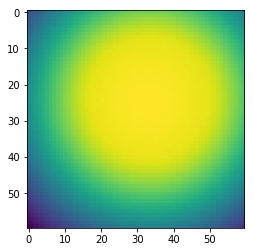

In [82]:
b = ana.load_beam_model('/home/combet/tmp_9rafts/60x60')
#b.interp_beam_BOT(amp=5, pd_corr=True)
im = b.make_image_BOT(ncols=60, nrows=60) # using interpolation to build image matching the raw data
plt.imshow(im)

In [251]:
#interpolated values
tmp1 = b.beam_image['nodes']['val']

In [252]:
# raw data (corrected for PD reading)
tmp2 = np.array(b.raw_data['val'][5]/np.array(b.raw_data['pd_value']))

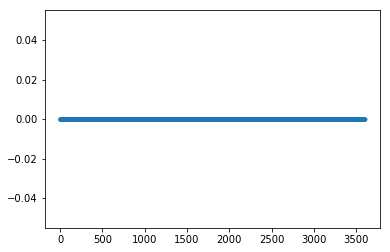

In [253]:
# relative difference - should be zero for all 3600 points if all went well
plt.plot((1-tmp2/tmp1)*100,'.')

#### Check if PD correction adds structure to beam profile

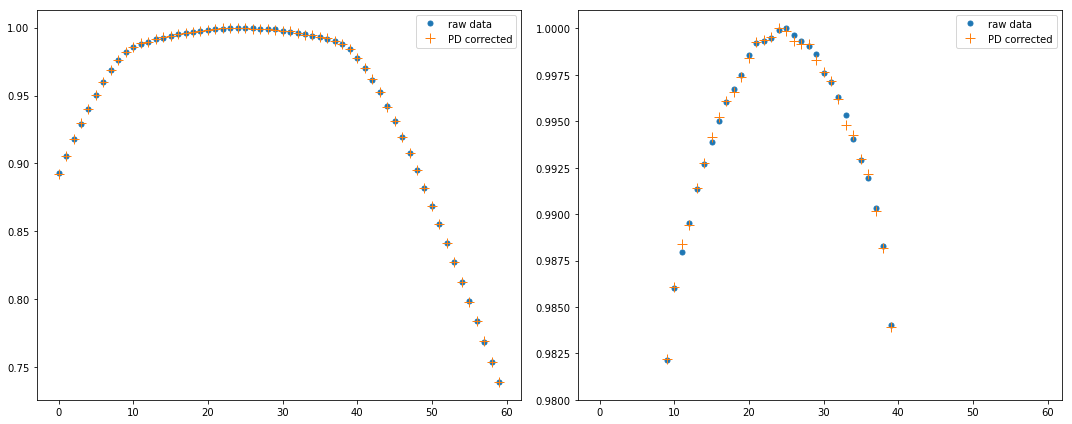

In [254]:
a0 = np.reshape(np.array(b.raw_data['val'][5]),(60,60))[25]
a = np.reshape(np.array(b.raw_data['val'][5])/np.array(b.raw_data['pd_value']),(60,60))[25]
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(15,6))
axes[0].plot(a0/np.max(a0), '.', label='raw data', markersize=10)
axes[0].plot(a/np.max(a), '+', label='PD corrected', markersize=10)
axes[1].plot(a0/np.max(a0), '.', label='raw data', markersize=10)
axes[1].plot(a/np.max(a), '+', label='PD corrected', markersize=10)
axes[1].set_ylim(0.98, 1.001)
axes[0].legend()
axes[1].legend()
fig.tight_layout()


#### Visual comparion of raw data versus interpolated values

In [255]:
a = np.reshape(np.array(b.raw_data['val'][5])/np.array(b.raw_data['pd_value']),(60,60))[25]
c = im.T[25]

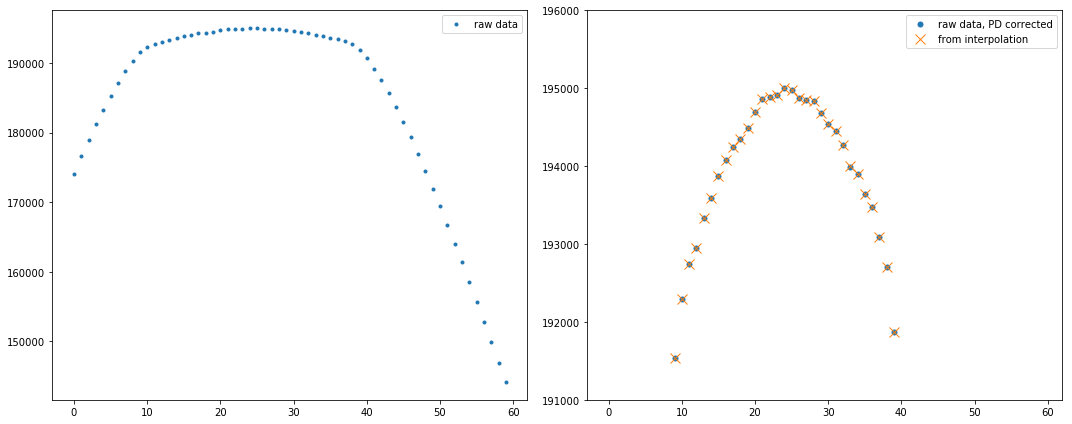

In [256]:
fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(15,6))
axes[0].plot(a, '.', label='raw data')
axes[1].plot(a, '.', markersize=10, label='raw data, PD corrected')
axes[1].plot(c, 'x', markersize=10, label='from interpolation')
axes[1].set_ylim([191000,196000])
axes[0].legend()
axes[1].legend()
fig.tight_layout()


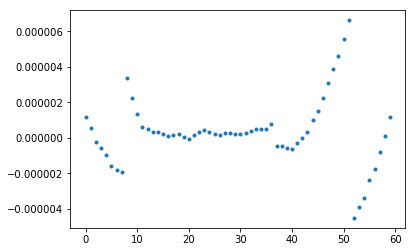

In [257]:
tmp = a/c
plt.plot((1.-tmp), '.')

## Now, really moving to interpolation at other locations than the nodes locations
Building 4000 x 4000 image of the beam model (NB: the beam model spans a 2 x 2 CCD range)

### 60 x 60 scan, default settings

/home/combet/tmp_9rafts/60x60/beam_object_R22_S11_red_on.pkl


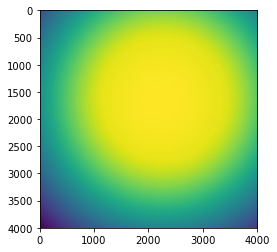

In [64]:
b1 = ana.load_beam_model('/home/combet/tmp_9rafts/60x60')
im1 = b1.make_image_BOT(ncols=4000, nrows=4000)
plt.imshow(im1)

### 12 x 12 scan, default settings

/home/combet/tmp_9rafts/12x12/beam_object_R22_S11_red_on.pkl


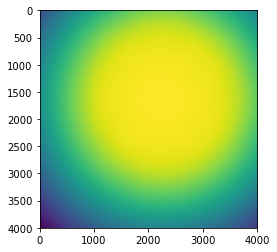

In [61]:
b2 = ana.load_beam_model('/home/combet/tmp_9rafts/12x12')
#b2.interp_beam_BOT(amp=5, pd_corr=True)
im2 = b2.make_image_BOT(ncols=4000, nrows=4000)
plt.imshow(im2)

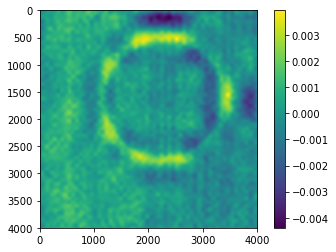

In [260]:
plt.imshow((im1-im2)/im1)
plt.colorbar()

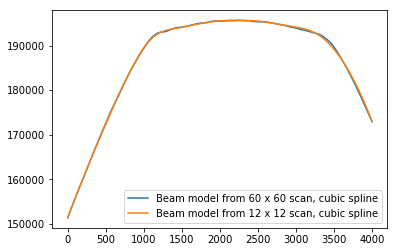

In [261]:
plt.plot(im1[1500], label='Beam model from 60 x 60 scan, cubic spline')
plt.plot(im2[1500], label='Beam model from 12 x 12 scan, cubic spline')
plt.legend()

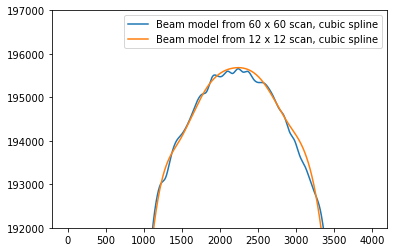

In [262]:
plt.plot(im1[1500], label='Beam model from 60 x 60 scan, cubic spline')
plt.plot(im2[1500], label='Beam model from 12 x 12 scan, cubic spline')
plt.ylim([192000,197000])
plt.legend()

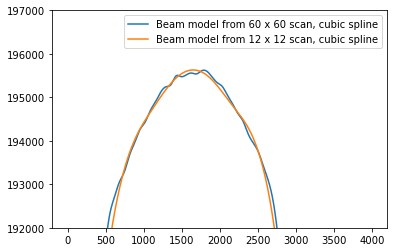

In [263]:
plt.plot(im1.T[2000], label='Beam model from 60 x 60 scan, cubic spline')
plt.plot(im2.T[2000], label='Beam model from 12 x 12 scan, cubic spline')
plt.ylim([192000,197000])
plt.legend()

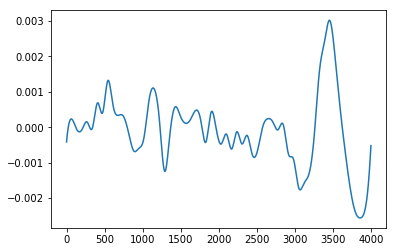

In [264]:
plt.plot((im1[1500]-im2[1500])/im1[1500])

### 60 x 60 scan, using linear spline rather than cubic spline

/home/combet/tmp_9rafts/60x60/beam_object_R22_S11_red_on.pkl


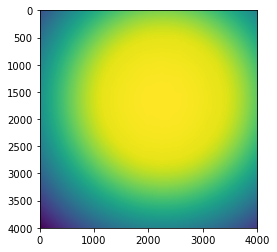

In [267]:
b_lin = ana.load_beam_model('/home/combet/tmp_9rafts/60x60')
b_lin.interp_beam_BOT(amp=5, pd_corr=True, spline_kind='linear')
im_lin = b_lin.make_image_BOT(ncols=4000, nrows=4000)
plt.imshow(im_lin)

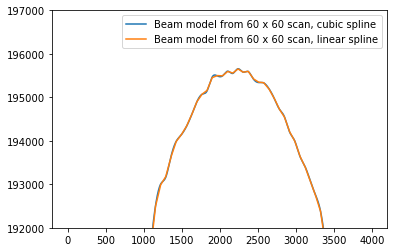

In [268]:
plt.plot(im1[1500], label='Beam model from 60 x 60 scan, cubic spline')
plt.plot(im_lin[1500], label='Beam model from 60 x 60 scan, linear spline')
plt.ylim([192000,197000])
plt.legend()

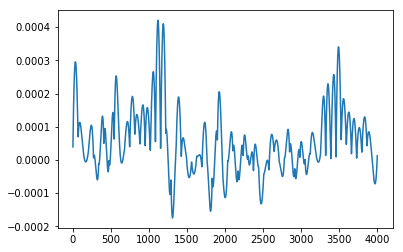

In [269]:
plt.plot((im1-im_lin)[1500]/im1[1500])

### 60 x 60 scan, but using only a point every N points to generate the interpolation function

/home/combet/tmp_9rafts/60x60/beam_object_R22_S11_red_on.pkl


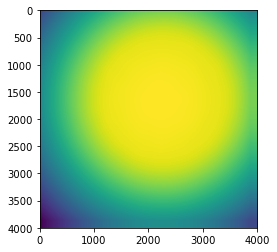

In [270]:
b3 = ana.load_beam_model('/home/combet/tmp_9rafts/60x60')
b3.interp_beam_BOT(amp=5, pd_corr=True, step=3)
im3 = b3.make_image_BOT(ncols=4000, nrows=4000)
plt.imshow(im3)

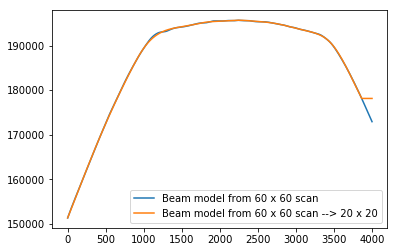

In [271]:
plt.plot(im1[1500], label='Beam model from 60 x 60 scan')
plt.plot(im3[1500], label='Beam model from 60 x 60 scan --> 20 x 20')
plt.legend()

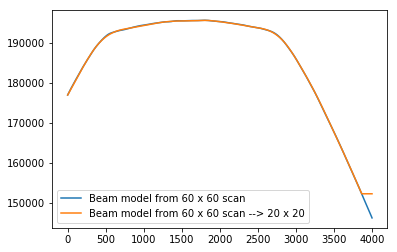

In [272]:
plt.plot(im1.T[2000], label='Beam model from 60 x 60 scan')
plt.plot(im3.T[2000], label='Beam model from 60 x 60 scan --> 20 x 20')
plt.legend()

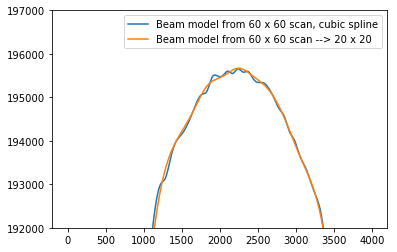

In [273]:
plt.plot(im1[1500], label='Beam model from 60 x 60 scan, cubic spline')
plt.plot(im3[1500], label='Beam model from 60 x 60 scan --> 20 x 20')
plt.ylim([192000,197000])
plt.legend()

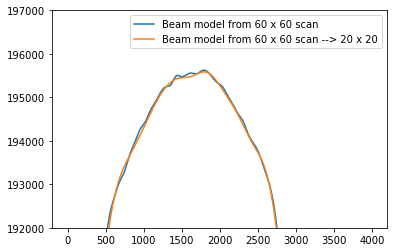

In [274]:
plt.plot(im1.T[2000], label='Beam model from 60 x 60 scan')
plt.plot(im3.T[2000], label='Beam model from 60 x 60 scan --> 20 x 20')
plt.ylim([192000,197000])
plt.legend()

In [ ]:
plt.plot(np.abs((im1-im3)[1500])/im1[1500])
plt.yscale('log')

In [ ]:
plt.imshow(np.log10(np.abs(im1-im3)/im1), vmin=-5, vmax=-1)
plt.colorbar()

### Test RBF (radial basis function) interpolation method

/home/combet/tmp_9rafts/60x60/beam_object_R22_S11_red_on.pkl


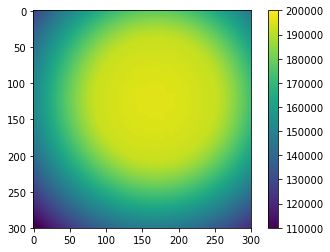

In [138]:
b4 = ana.load_beam_model('/home/combet/tmp_9rafts/60x60')
b4.interp_beam_BOT(amp=5, pd_corr=True)
im4 = b4.make_image_BOT(ncols=300, nrows=300)
plt.imshow(im4, vmin=110000, vmax=200000)
plt.colorbar()

In [139]:
 b4.find_max_from_avg()

In [140]:
b4.properties

{'ref_raft': 'R22',
 'ref_slot': 'S11',
 'ref_amp': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 'ref_pix_x': 1000,
 'ref_pix_y': 256,
 'npix_for_avg': 30,
 'analysis_amp': 5,
 'ncols': 300,
 'nrows': 300,
 'max_xccob': 14.964832775919731,
 'max_yccob': -4.525301003344488,
 'max_xarg': 168,
 'max_yarg': 123}

In [202]:
b5 = ana.load_beam_model('/home/combet/tmp_9rafts/60x60')
b5.interp_beam_BOT(amp=5, pd_corr=True, kind='rbf')
im5 = b5.make_image_BOT(ncols=300, nrows=30)
plt.imshow(im5, vmin=110000, vmax=200000)
plt.colorbar()

/home/combet/tmp_9rafts/60x60/beam_object_R22_S11_red_on.pkl


ValueError: Array lengths must be equal

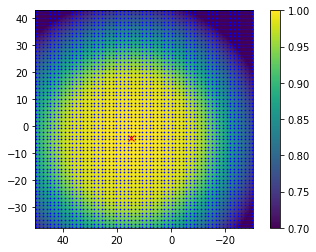

{'ref_raft': 'R22',
 'ref_slot': 'S11',
 'ref_amp': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 'ref_pix_x': 1000,
 'ref_pix_y': 256,
 'npix_for_avg': 30,
 'analysis_amp': 5,
 'ncols': 300,
 'nrows': 300,
 'max_xccob': 14.964832775919731,
 'max_yccob': -4.525301003344488,
 'max_xarg': 168,
 'max_yarg': 123}

In [75]:
b5.plot_BOT()
b5.properties

/home/combet/tmp_9rafts/60x60/beam_object_R22_S11_red_on.pkl


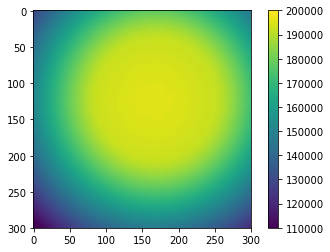

In [133]:
b6 = ana.load_beam_model('/home/combet/tmp_9rafts/60x60')
b6.interp_beam_BOT(amp=5, pd_corr=True, kind='rectbivariate')
im6 = b6.make_image_BOT(ncols=300, nrows=300)
b6.find_max_from_avg()
plt.imshow(im6, vmin=110000, vmax=200000)
plt.colorbar()

In [134]:
b6.properties

{'ref_raft': 'R22',
 'ref_slot': 'S11',
 'ref_amp': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 'ref_pix_x': 1000,
 'ref_pix_y': 256,
 'npix_for_avg': 30,
 'analysis_amp': 5,
 'ncols': 300,
 'nrows': 300,
 'max_xccob': 14.964832775919731,
 'max_yccob': -4.525301003344488,
 'max_xarg': 168,
 'max_yarg': 123}

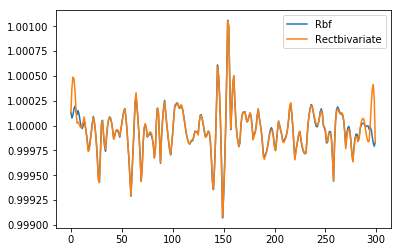

In [98]:
plt.plot(im5[120]/im4[120], label='Rbf')
plt.plot(im6[120]/im4[120], label='Rectbivariate')
#plt.ylim([192000,197000])

plt.legend()

In [13]:
a=[1,3,4]
np.tile(a,4)

array([1, 3, 4, 1, 3, 4, 1, 3, 4, 1, 3, 4])

In [15]:
b=[5,6,7]
np.repeat(b,4)

array([5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7])

In [48]:
np.shape(im4)

(4000, 4000)

In [70]:
x_coarse, y_coarse = np.mgrid[0:5, 0:5]

In [73]:
x_coarse.ravel()

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4])

In [74]:
 y_coarse.ravel()
    

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4])

In [75]:
x_coarse.flatten()

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4])

In [76]:
y_coarse.flatten()

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4])

In [187]:
import scipy.interpolate as interpolate

nrows=10
ncols=7

x =  np.linspace(0,3,ncols)
x = np.repeat(x, nrows)
y =  np.linspace(0,5,nrows)
y = np.tile(y,ncols)
d = x*y

raw_image = np.reshape(d,(nrows, ncols), order='F')

interp_rbf = interpolate.Rbf(x, y, d)  # radial basis function interpolator instance

interp_spline = interpolate.interp2d(np.unique(x), 
                                     np.unique(y), 
                                     raw_image)

#interp_spline = interpolate.interp2d(x,y,d)


interp_bivariate = interpolate.RectBivariateSpline(np.unique(y), 
                                                   np.unique(x), 
                                                   raw_image)
 

In [191]:
np.shape(raw_image)

(10, 7)

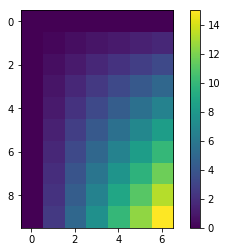

In [192]:
plt.imshow(raw_image)
plt.colorbar()

In [196]:
nrows_new = 30
ncols_new = 150
xi = np.linspace(0, 3, ncols_new)
xi_r = np.repeat(xi, nrows_new)
yi = np.linspace(0, 5, nrows_new)
yi_r = np.tile(yi, ncols_new)
di = interp_rbf(xi_r, yi_r)   # interpolated values

di.shape

(4500,)

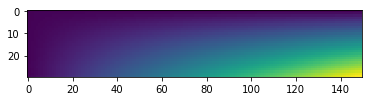

In [197]:
rbf_image = di.reshape((nrows_new,ncols_new), order='F')
plt.imshow(rbf_image)

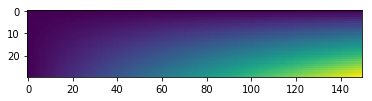

In [198]:
spline_image=interp_spline(xi, yi)
plt.imshow(spline_image)

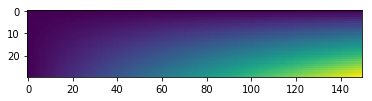

In [199]:
bivariate_image=interp_bivariate(yi, xi)
plt.imshow(bivariate_image)

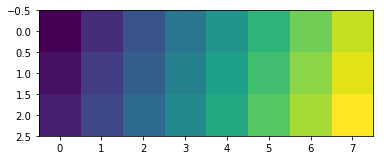

In [172]:
a = np.arange(24).reshape((3, 8), order='F')
plt.imshow(a)

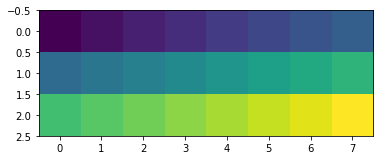

In [173]:
a = np.arange(24).reshape((3, 8))
plt.imshow(a)

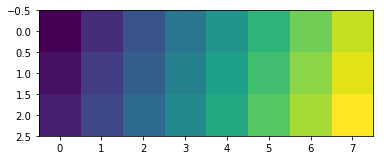

In [231]:
a = np.arange(24).reshape((8, 3)).T
plt.imshow(a)

In [177]:
b4.beam_image['yarr']

array([-37.435     , -33.22447368, -29.01394737, -24.80342105,
       -20.59289474, -16.38236842, -12.17184211,  -7.96131579,
        -3.75078947,   0.45973684,   4.67026316,   8.88078947,
        13.09131579,  17.30184211,  21.51236842,  25.72289474,
        29.93342105,  34.14394737,  38.35447368,  42.565     ])